In [1]:
import sys
import os
import ipywidgets as widgets
from ipywidgets import interact
sys.path.append('../scripts')
from data_loader import *
from eda import *
from eda_creditcard import *

In [2]:
# path to the CSV file
filename1 = 'fraud_ip_data.parquet'
filename2 = 'credit_card_data.parquet'

path1 = os.path.join('..', 'data/processed', filename1)
path2 = os.path.join('..', 'data/processed', filename2)

# Load dataset
fraud_ip_data = load_data(path1)
credit_card_data = load_data(path2)

In [3]:
fraud_ip_data.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age  ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387      0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820      1  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443      0        Unknown  
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117      0  United States

In [4]:
credit_card_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## IP Fraud Data EDA 

In [3]:
columns_to_exclude = ['user_id', 'device_id', 'signup_time', 'purchase_time']
df = fraud_ip_data.drop(columns=columns_to_exclude)

## Univariate Analysis

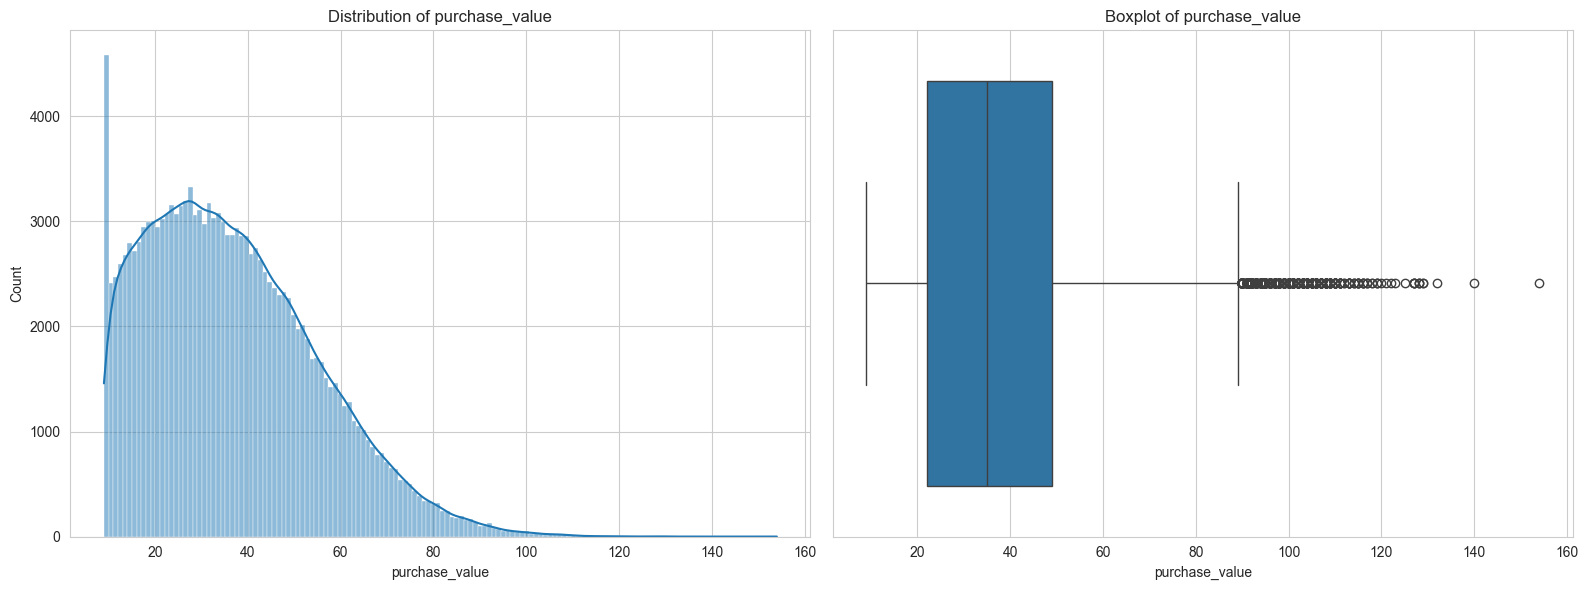

Outliers in purchase_value: 1067


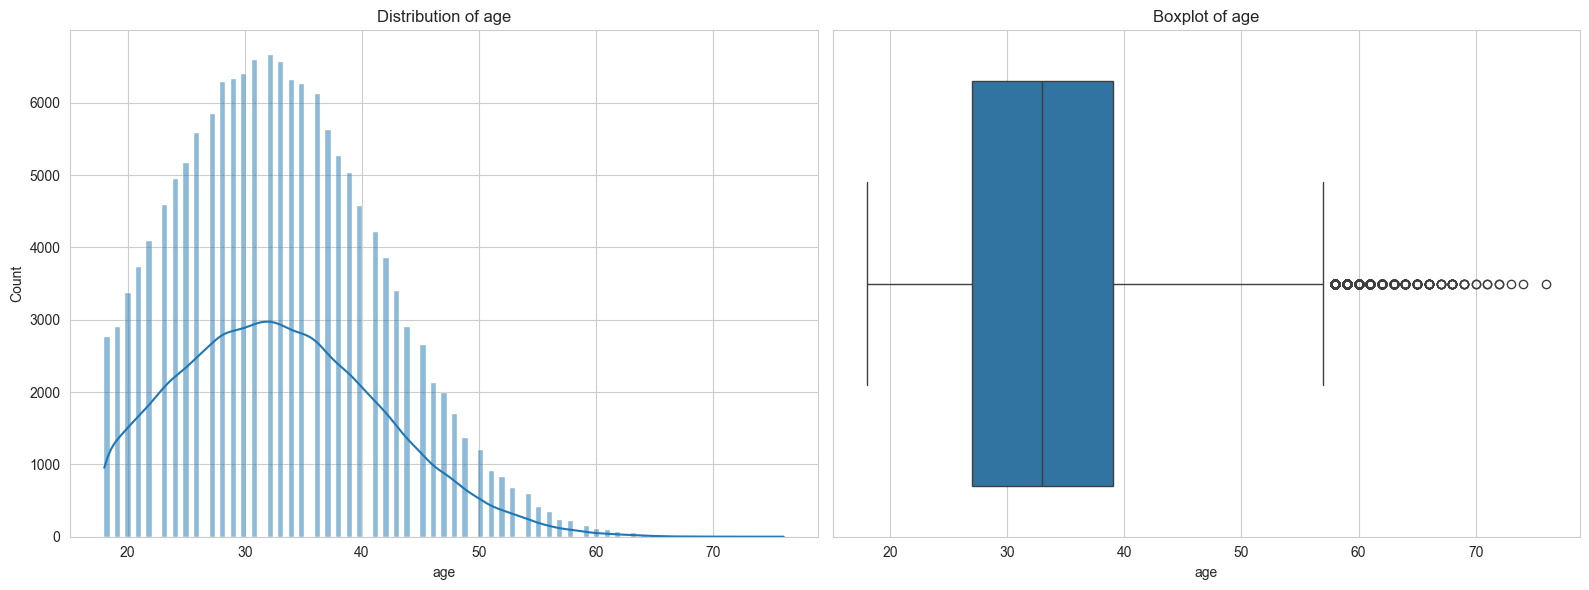

Outliers in age: 776


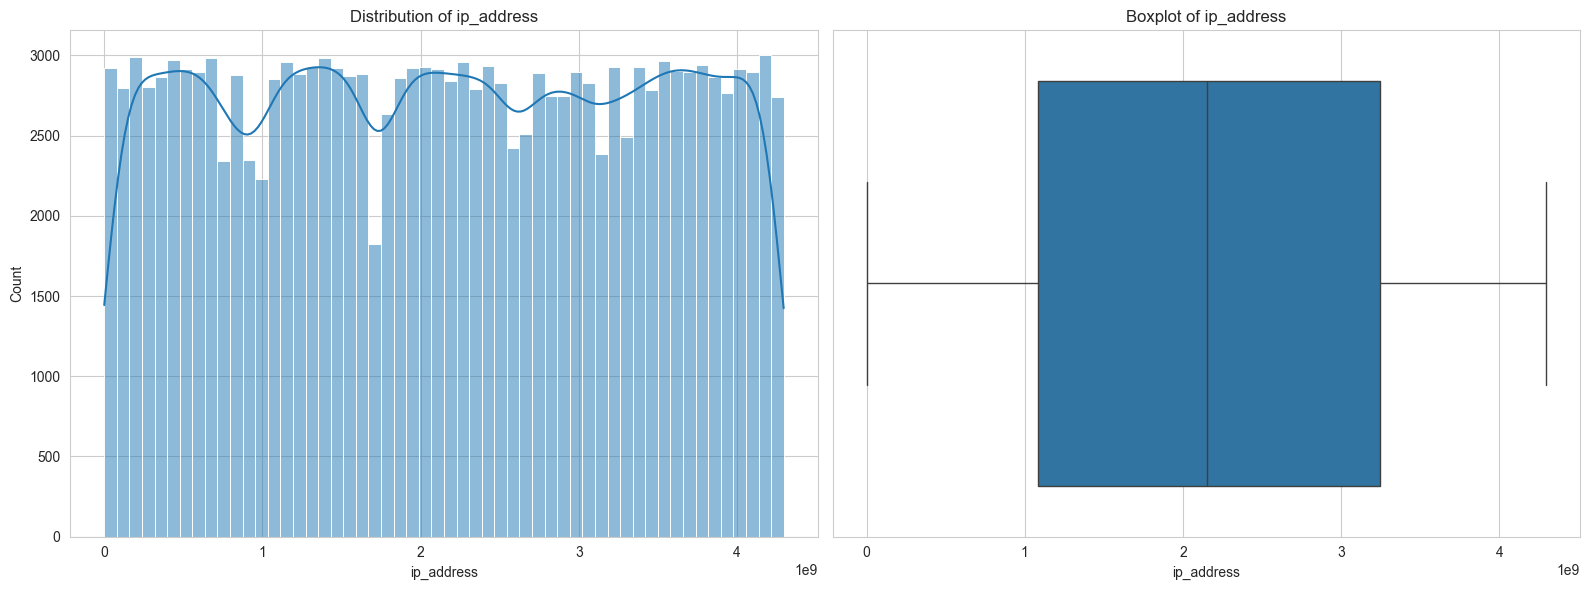

Outliers in ip_address: 0


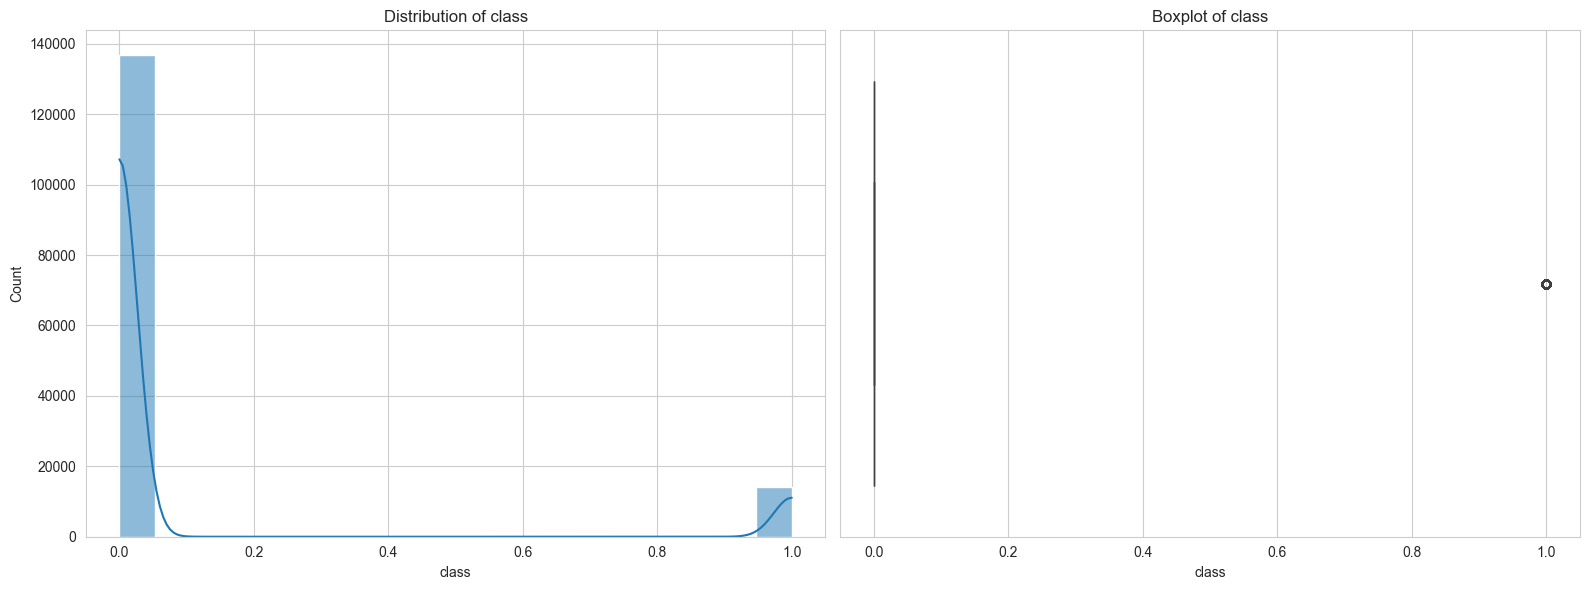

Outliers in class: 14151


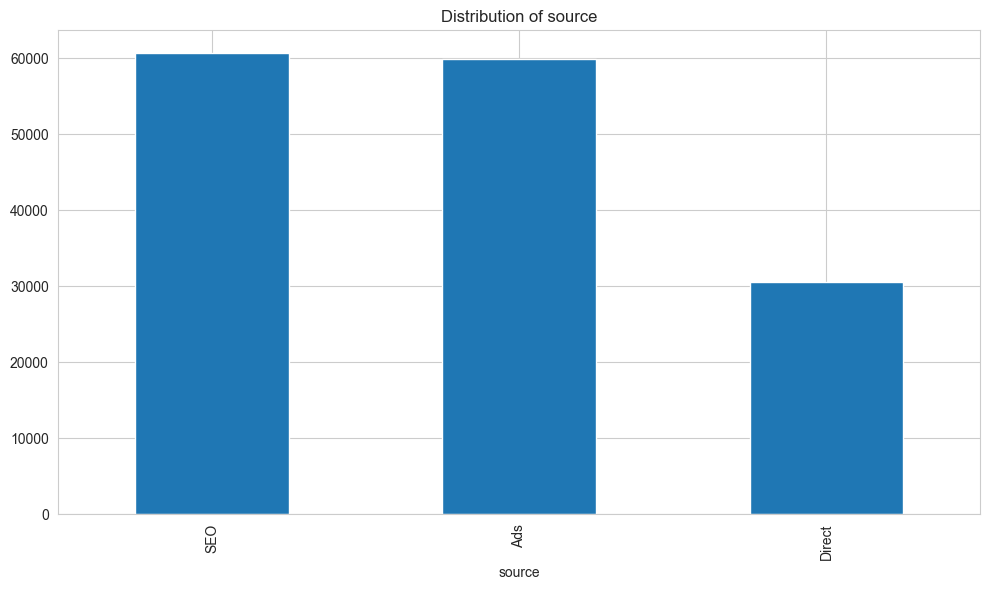

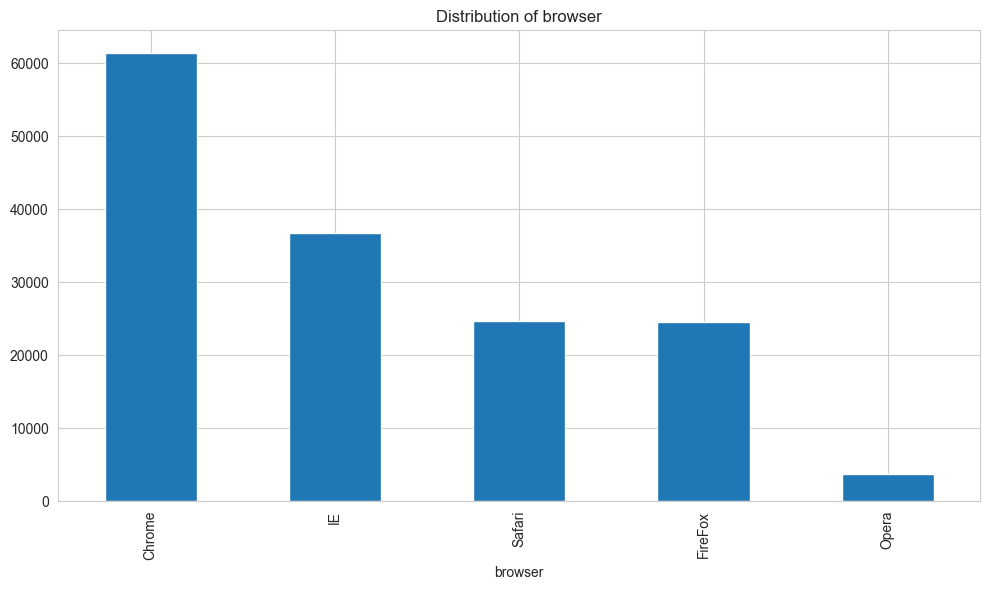

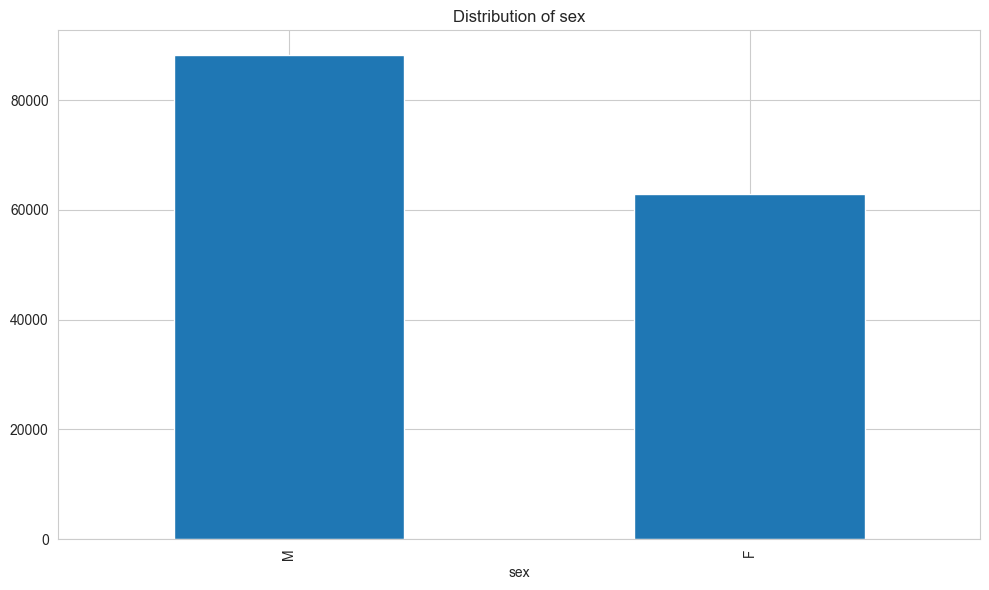

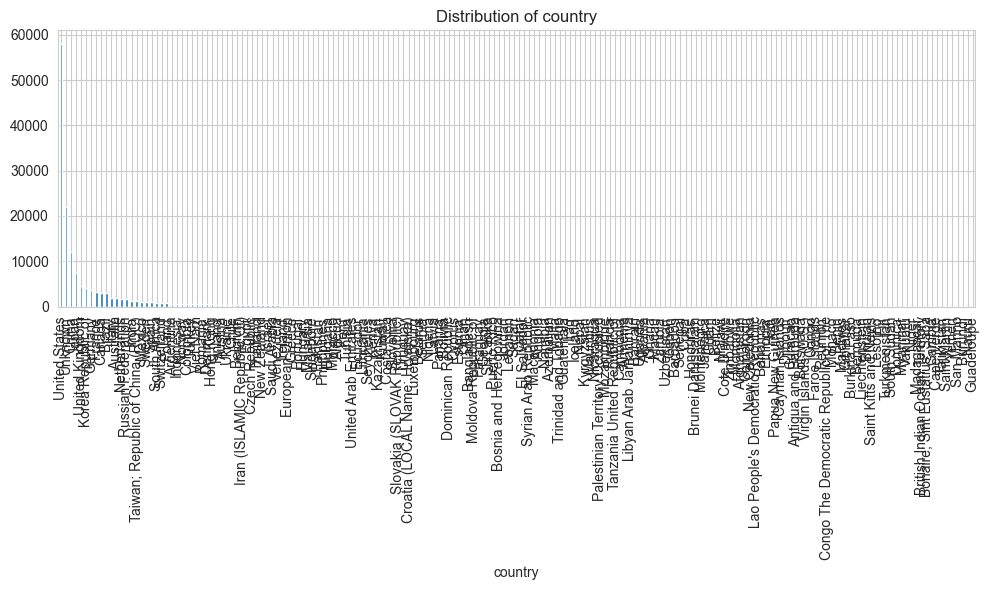

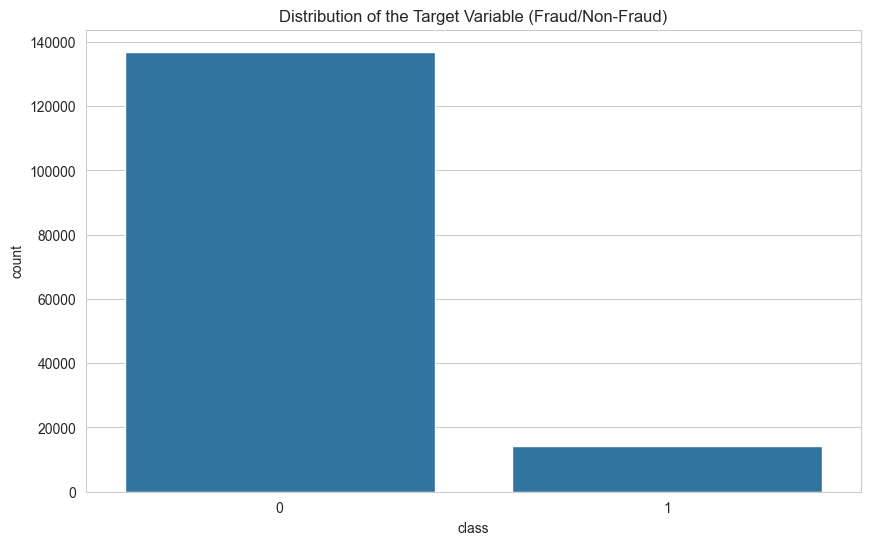

In [4]:
univariate_analysis(df)

## Bivariate Analysis

In [5]:
bivariate_analysis(df)

interactive(children=(Dropdown(description='feature', options=('purchase_value', 'age', 'ip_address', 'class')…

interactive(children=(Dropdown(description='feature', options=('source', 'browser', 'sex', 'country'), value='…

ANOVA Results:
purchase_value: F-statistic=0.15, p-value=0.6943
age: F-statistic=6.63, p-value=0.0100
ip_address: F-statistic=4.10, p-value=0.0429


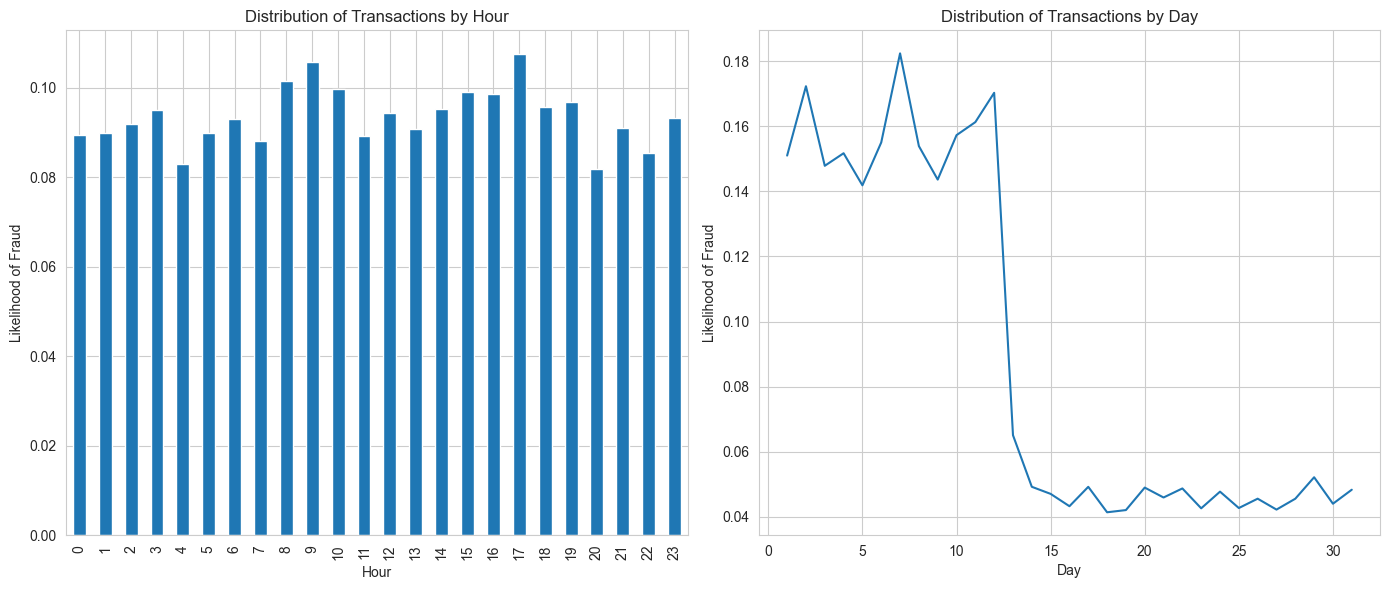

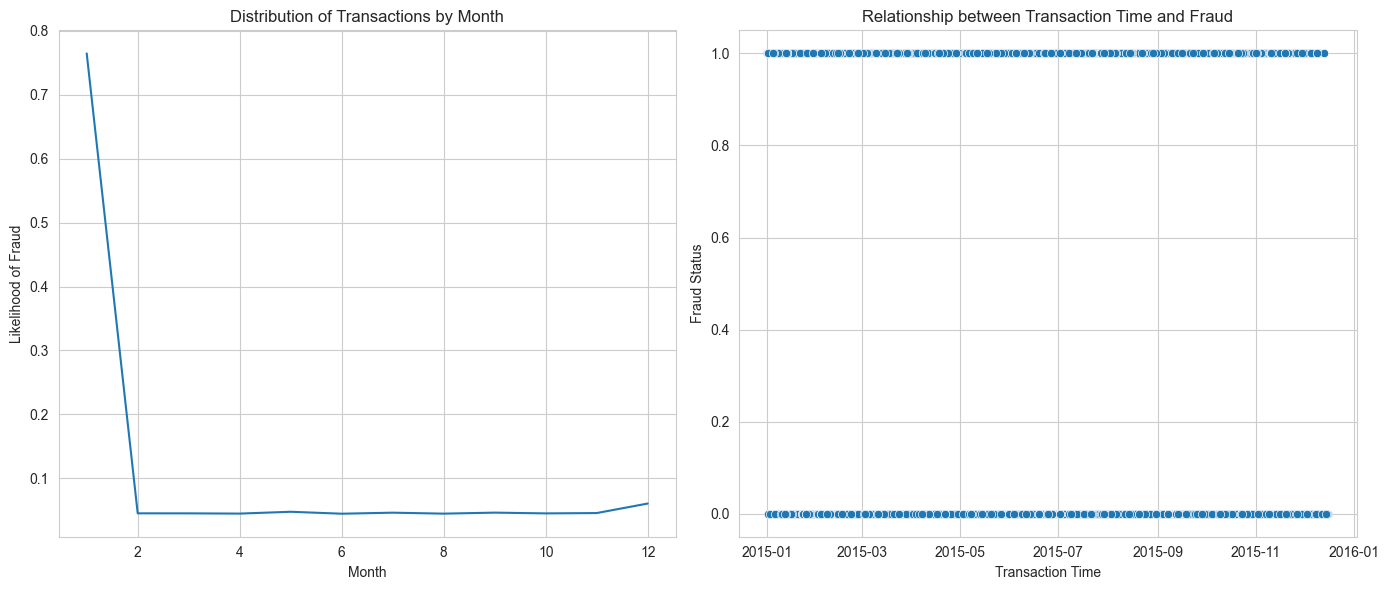

<Figure size 1200x800 with 0 Axes>

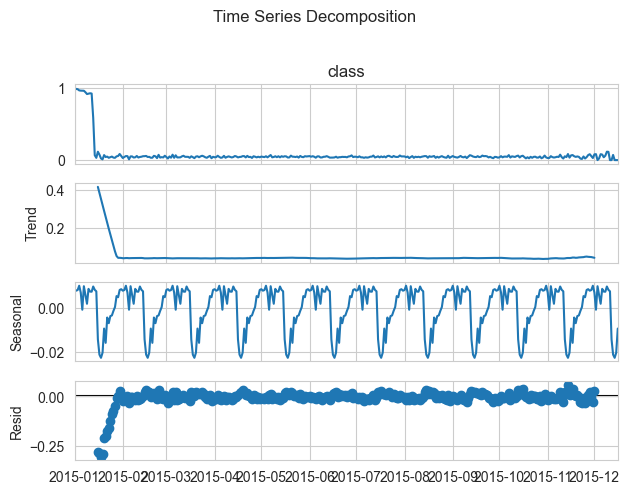

ADF Statistic: -8.15
p-value: 0.0000
The time series is stationary.


In [6]:
time_series_analysis(fraud_ip_data)

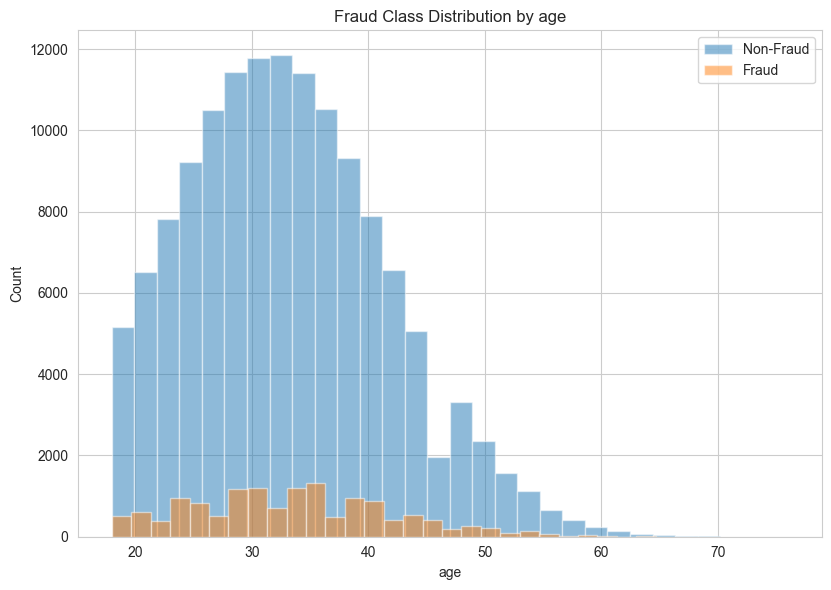

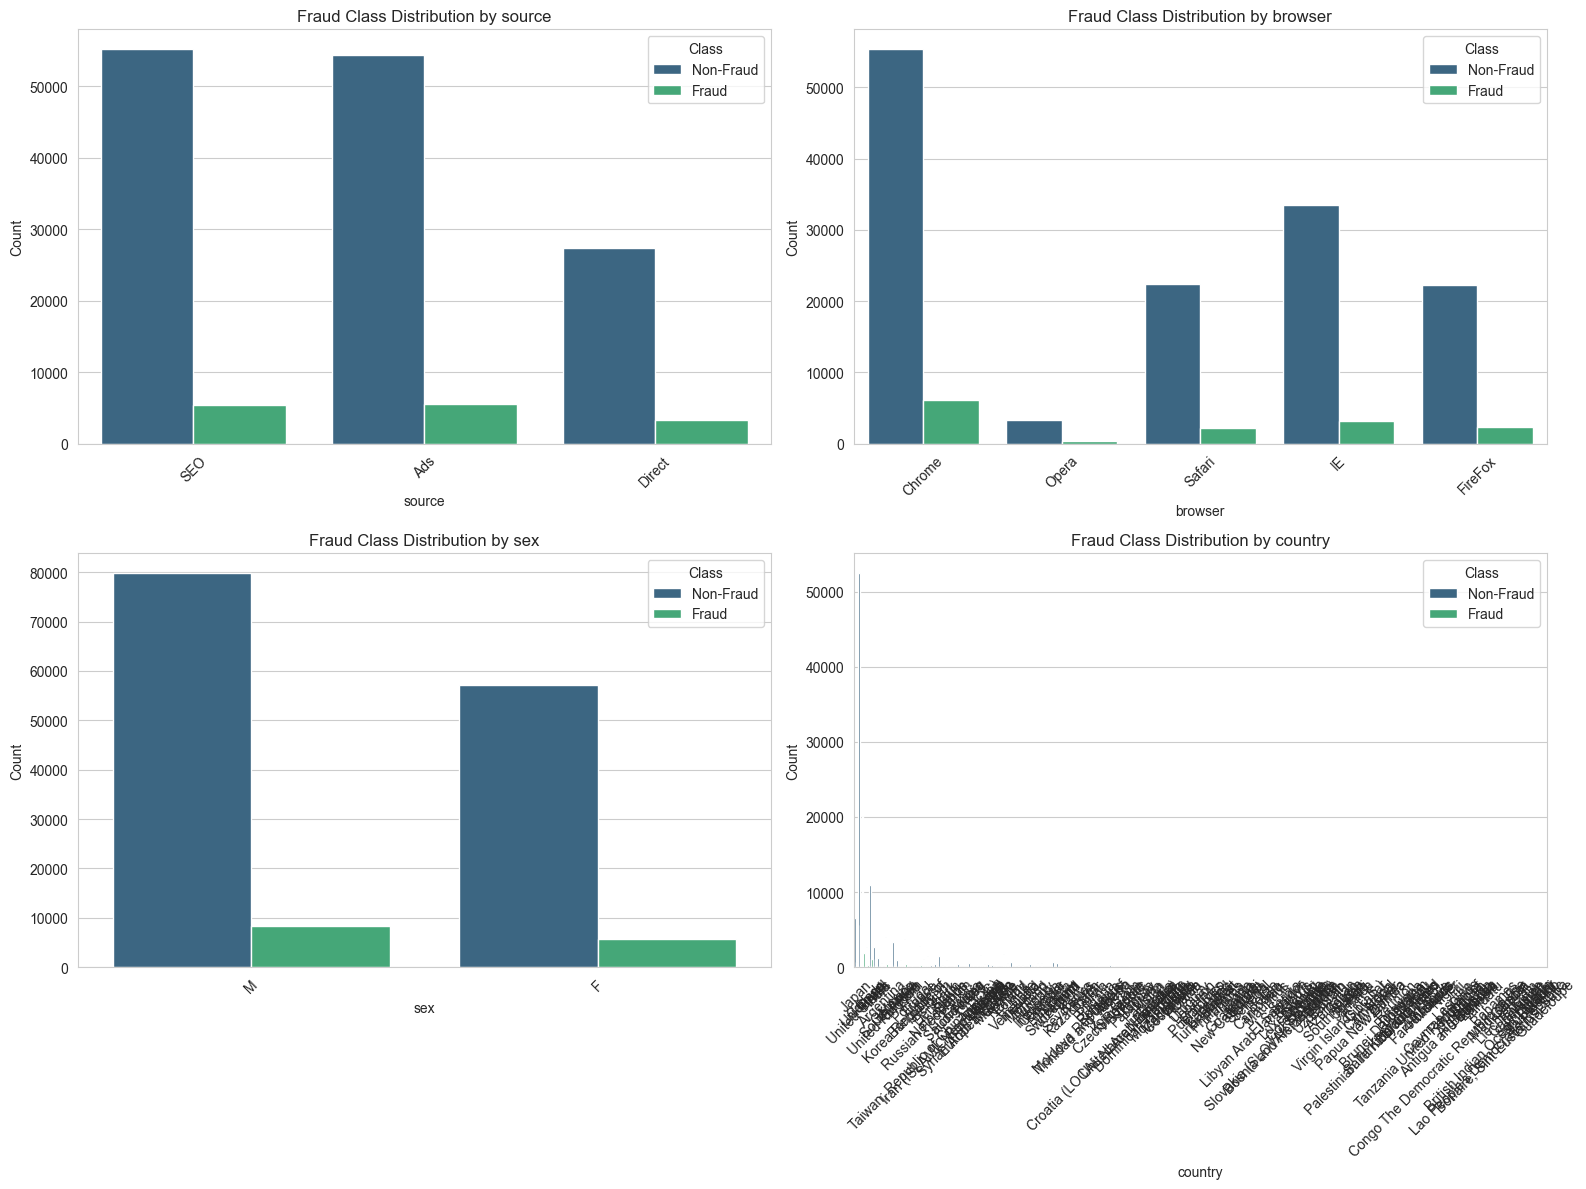

In [7]:
fraud_class_distribution(fraud_ip_data)

## Creadit Card Data EDA

### Random Forest Feature Importance

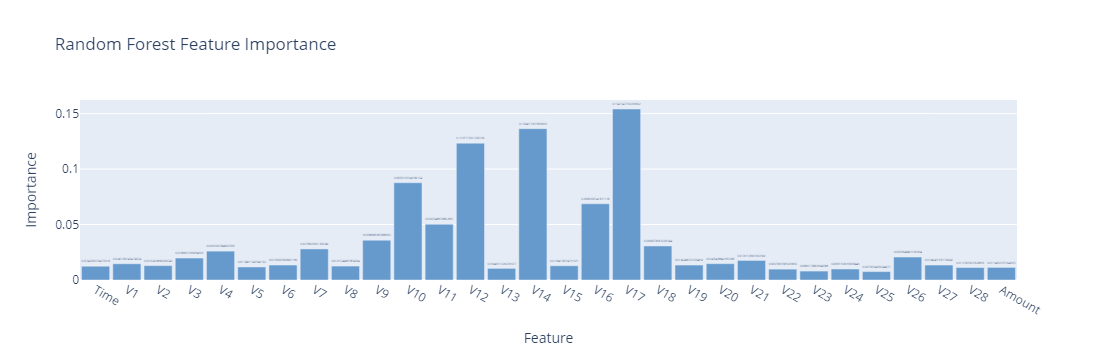

In [6]:
plot_random_forest_feature_importance(credit_card_data)

### Correlation matrix

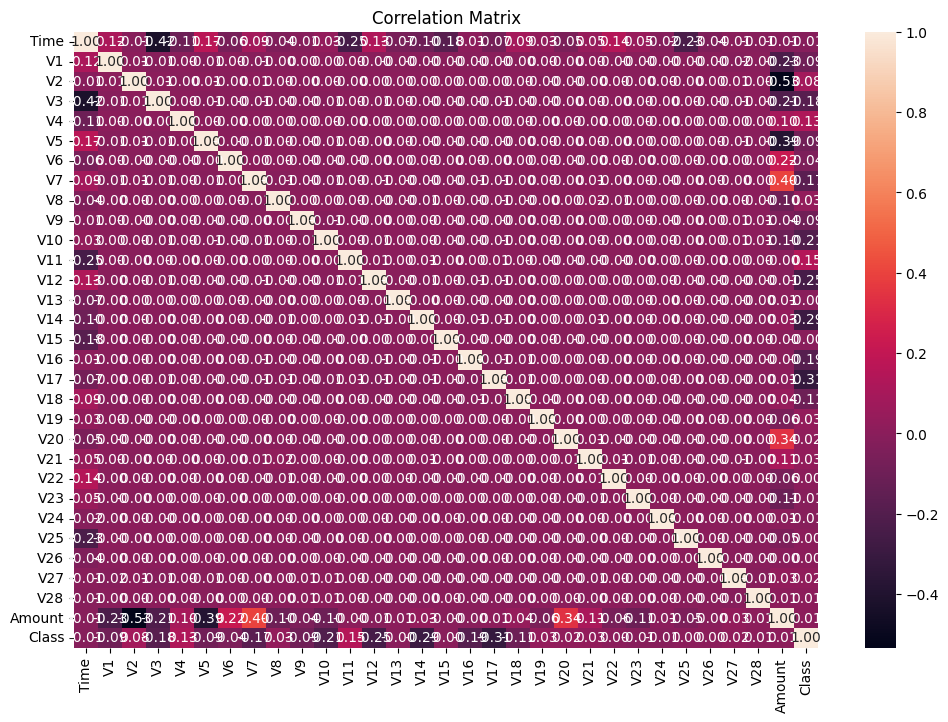

In [3]:
corr_matrix = credit_card_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()